In [1]:
from pylabnet.hardware.awg.quantum_machine import Driver
from pylabnet.utils.logging.logger import LogClient
from configuration import config

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt


In [2]:
dev_id = 'QM_ford'

# Instantiate
logger = LogClient(
    host='192.168.50.101', 
    port=38967,
    module_tag=f'Quantum Machine {dev_id}'
)

In [3]:
# Instanciate Hardware class
qm = Driver(dev_id, logger=logger)

2022-02-28 13:30:19,509 - qm - INFO - Performing health check
2022-02-28 13:30:19,514 - qm - INFO - Health check passed


In [4]:
from qm.qua import program, infinite_loop_, play, wait

# programe
print('start...')
with program() as prog:
    with infinite_loop_():
        play('trigger', 'tt') 
        # play('X', 'e_spin')
        wait(100, 'tt')

qm.execute(config, prog)

start...
2022-02-28 13:30:20,513 - qm - INFO - Flags: 
2022-02-28 13:30:20,514 - qm - INFO - Sending program to QOP
2022-02-28 13:30:20,535 - qm - INFO - Executing program


2022-02-28 13:30:21,704 - qm - INFO - Flags: 
2022-02-28 13:30:21,704 - qm - INFO - Simulating program


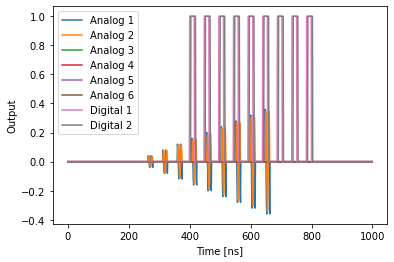

In [5]:
from qm.qua import program, declare, for_, reset_phase, amp, fixed
from qm.simulate import SimulationConfig

with program() as sim_test:
    a = declare(fixed)
    with for_(a, 0.1, a < 1, a + 0.1):
        reset_phase('e_spin')
        play('const' * amp(a), 'e_spin')

job, samples = qm.simulate(config, sim_test, duration=250)

# plot all ports:
samples.con1.plot()